

# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [99]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [100]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling



In [101]:
# Load your data and print out a few lines. Perform operations to inspect data
df_1 = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df_1.head()
#   types and look for instances of missing or possibly errant data.



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [102]:
df_1.shape

(110527, 14)

In [103]:
df_1.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [104]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


it is good we don't have missing data
the data is organized not as boolean
as columns like hypertension and diabetis, extra giving the yes a value of 1
we have some mistakes in the spelling of hypertestion and handicap, and may do some modifications 
we need to split the data to whoe show and who didn't 

In [105]:
df_1.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


wh have an age value with minues either i drop it or replace it with value 1, and a handicap value with 4 

In [106]:
df_1.duplicated().sum()

0

we have no duplicated values lets see if we have duplicated id

In [107]:
df_1.duplicated('PatientId')

0         False
1         False
2         False
3         False
4         False
          ...  
110522     True
110523     True
110524    False
110525     True
110526     True
Length: 110527, dtype: bool

so we have a duplicated patient id, and we need to see if they take more than one appointment and don't show or vice verse,  

In [108]:
df_1.duplicated(['PatientId', 'No-show'])

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523     True
110524    False
110525     True
110526     True
Length: 110527, dtype: bool

we will need to take action on this thing, lets check more on data

In [109]:
df_1.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

the handicaps columns need to be investigated

In [110]:
df_1['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

disabilitywe have four categories of handicap persons, i think it is the grade of the disability


### Data Cleaning

 

we will start our cleaning with monifications on columns name, ajust the age minues problem, drop duplocates of patient_id with the same attending status,

In [111]:
df_1.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [112]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df_1.rename(columns = {'PatientId': 'Patient_Id', 'AppointmentID':'Appointment_ID', 'Scheduled_Day':'Scheduled_Day', 'AppointmentDay': 'Appointment_Day', 'Hipertension':'Hypertension', 'Handcap':'Handicap','No-show':'No_show'}, inplace = True)

In [113]:
df_1.head()

,Patient_Id,Appointment_ID,Gender,ScheduledDay,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


now we are going to fix age problem

In [114]:
df_1[df_1['Age']< 0]

,Patient_Id,Appointment_ID,Gender,ScheduledDay,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


we have only one row with age  with -1 value, i will transform it into 1

In [115]:
df_1.loc[df_1['Age']< 0, 'Age']= 1
df_1.describe()

,Patient_Id,Appointment_ID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088892,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110176,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


now we are going to drop duplicates with patient_id with the same attendence condition

In [116]:
df_1.duplicated(['Patient_Id', 'No_show']).sum()

38710

In [117]:
df_1.drop_duplicates(['Patient_Id', 'No_show'], inplace = True)
df_1.duplicated(['Patient_Id', 'No_show']).sum()

0

now we have cleaned the data lets check what we can do in the analysis stage

In [118]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71817 entries, 0 to 110524
Data columns (total 14 columns):
Patient_Id         71817 non-null float64
Appointment_ID     71817 non-null int64
Gender             71817 non-null object
ScheduledDay       71817 non-null object
Appointment_Day    71817 non-null object
Age                71817 non-null int64
Neighbourhood      71817 non-null object
Scholarship        71817 non-null int64
Hypertension       71817 non-null int64
Diabetes           71817 non-null int64
Alcoholism         71817 non-null int64
Handicap           71817 non-null int64
SMS_received       71817 non-null int64
No_show            71817 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 8.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

## the question we need to answer

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

to answer the question we need to see the out frame of the data

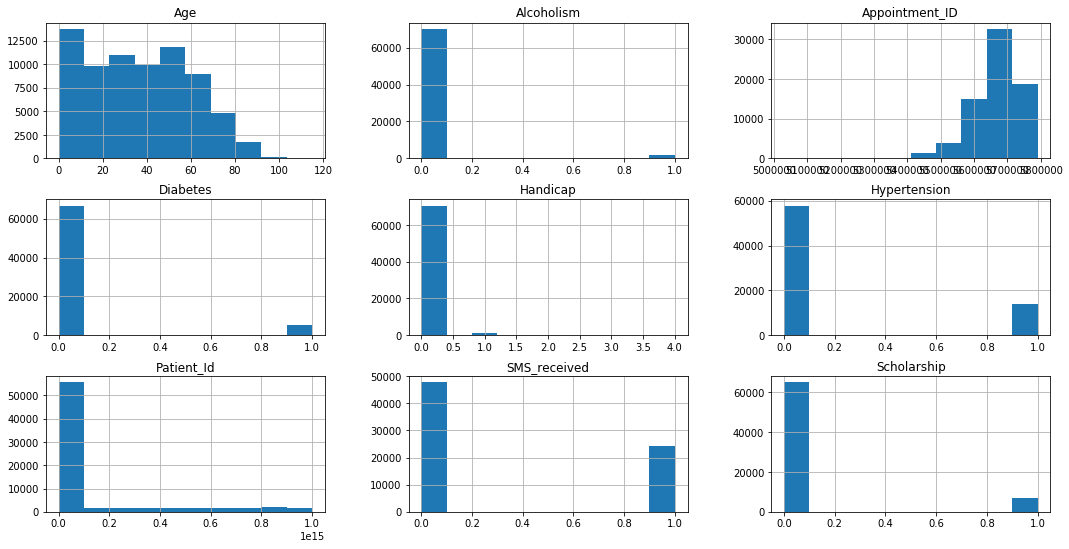

In [119]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_1.hist(figsize = (18, 9));

In [120]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71817 entries, 0 to 110524
Data columns (total 14 columns):
Patient_Id         71817 non-null float64
Appointment_ID     71817 non-null int64
Gender             71817 non-null object
ScheduledDay       71817 non-null object
Appointment_Day    71817 non-null object
Age                71817 non-null int64
Neighbourhood      71817 non-null object
Scholarship        71817 non-null int64
Hypertension       71817 non-null int64
Diabetes           71817 non-null int64
Alcoholism         71817 non-null int64
Handicap           71817 non-null int64
SMS_received       71817 non-null int64
No_show            71817 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 8.2+ MB


# first look
from the first look of the data we have many variables, each variable maybe has different weight on the effect of the appearence , we should investigate every variable to see which one with the bigger effect, and to see if the variable we can control or it is something out of our controll

## Age 
i want to start with the age effect so first we need split the data Frame to two groups, one for who attended and the other who didn't

In [121]:
df_1['No_show'].value_counts()

No     54154
Yes    17663
Name: No_show, dtype: int64

In [122]:
df_show = df_1.query('No_show == "No"')
df_no_show = df_1.query('No_show == "Yes" ')
df_show.head()

,Patient_Id,Appointment_ID,Gender,ScheduledDay,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [123]:
df_show.shape
percent_of_attenf = df_show.shape[0]/df_1.shape[0]
percent_of_attenf

0.7540554464820307

In [124]:
df_no_show.head()

,Patient_Id,Appointment_ID,Gender,ScheduledDay,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


In [125]:
df_no_show.shape
percetage_of_non_attend = df_no_show.shape[0]/df_1.shape[0]
percetage_of_non_attend

0.2459445535179693

this is important ratio, as it represents the No_show percentage to all the one who have take an appointement

In [126]:
percentage_between_non_attend = df_no_show.shape[0]/df_show.shape[0]
percentage_between_non_attend

0.32616242567492704

but this ratio represents the percentage of No_show to Show patient, so check between both

near to 25% of booking does not appear which is big percentage in my opinion lets investigate more
and the comparsion should have a reference of the 0.32 to compare between who attend and who didn't

In [127]:
df_show['Age'].describe()

count    54154.000000
mean        37.228497
std         23.710437
min          0.000000
25%         17.000000
50%         37.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

In [128]:
df_no_show['Age'].describe()

count    17663.000000
mean        34.376267
std         22.192819
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

it is so close lets build a function as we will use the hist of both a lot


In [129]:
def compare(col_name, title):
    df_show[col_name].hist(bins = 10,color = 'blue', label = 'show', alpha = 0.5, figsize = (10, 4))
    df_no_show[col_name].hist(bins = 10, color = 'red', label = 'now_show', alpha = 0.5, figsize = (10, 4))
    plt.legend()
    plt.title(title)
    plt.xlabel(col_name)
    plt.ylabel('patient_no')
    
    

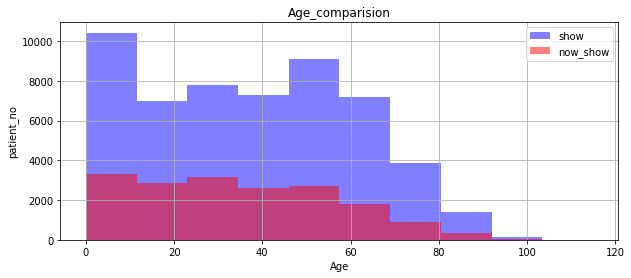

In [130]:
compare('Age', 'Age_comparision')

we can understand the big number if infantiles vs the rest of the categories, but i thought that number would increase again with elderlies, but this didn't happen, and the number decreased with the same pattern for whom didn't attend, maybe we would investigate this later 

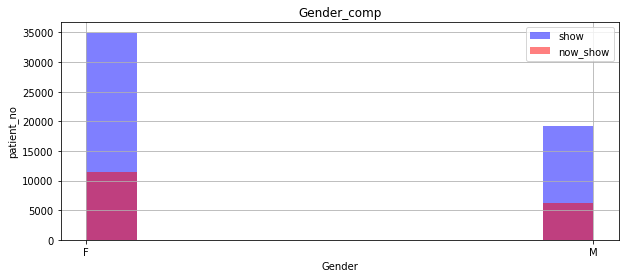

In [131]:
compare('Gender', 'Gender_comp')

we can notice that number of female patient is more than male, and by look we can notice as usual nearly 25 %  of patient doesn't attend according to the equation we saw in the first, maybe the percentage of female that doesn't attent is more than 25 %, lets check this

In [132]:
Female_attend = df_show[df_show['Gender'] == 'F']
Female_attend.shape[0]

34961

In [133]:
Female_no_attend = df_no_show[df_no_show['Gender'] == 'F']
Female_no_attend.shape[0]

11506

In [134]:
compar_f = Female_no_attend.shape[0]/Female_attend.shape[0]
compar_f 

0.3291095792454449

Gender is not a big factor we can relay on, let check Neighbourhood

Text(0.5,0,'Neighbourhood')

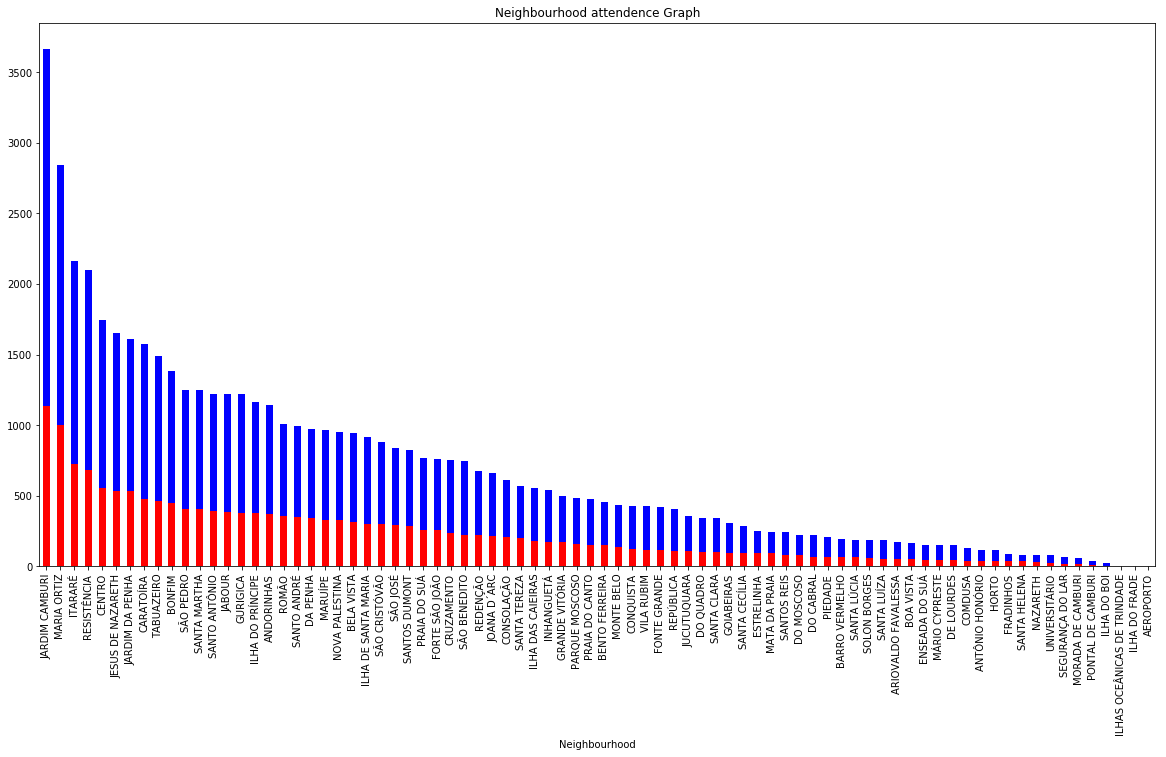

In [135]:
df_show['Neighbourhood'].value_counts().plot(kind = 'bar', color = 'blue', figsize = (20,10))
df_no_show['Neighbourhood'].value_counts().plot(kind = 'bar', color = 'red', figsize = (20,10))
plt.title('Neighbourhood attendence Graph')
plt.xlabel('Neighbourhood')


we have many variations between each district, some Neighborhoods the attendence is much bigger the other, maybe because of the population of each one

In [136]:
df_no_show['Neighbourhood'].value_counts()

JARDIM CAMBURI                 1134
MARIA ORTIZ                    1000
ITARARÉ                         725
RESISTÊNCIA                     682
CENTRO                          555
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64

we have about 80 area, lets see if we can use a tool to investigate

till now we found huge differences beteween different ditricts, but i can't find a battern to follow according we have so many Neighborhoods 
lets check chronic diseases

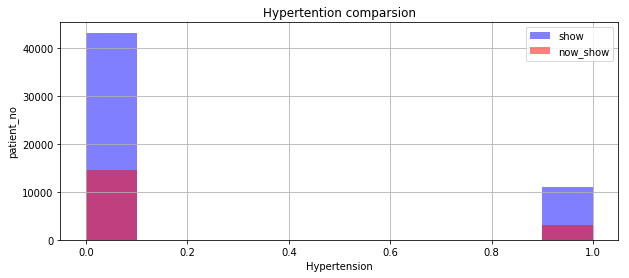

In [137]:
compare('Hypertension', 'Hypertention comparsion')

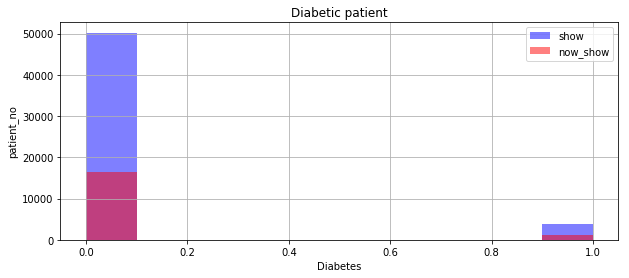

In [138]:
compare('Diabetes', 'Diabetic patient')

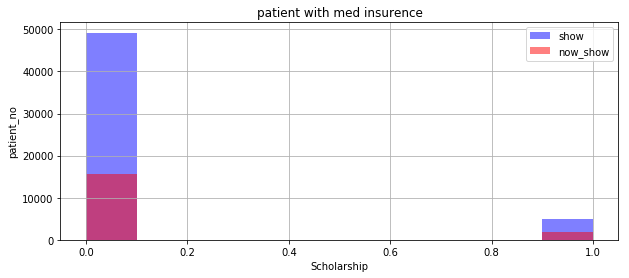

In [139]:
compare('Scholarship', 'patient with med insurence')

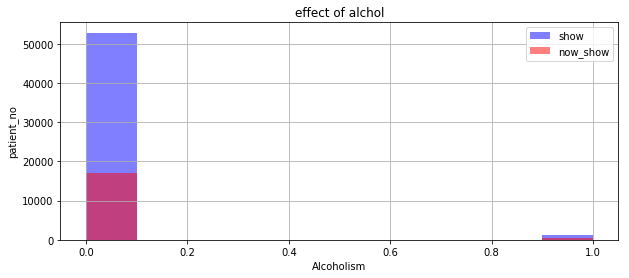

In [140]:
compare('Alcoholism', 'effect of alchol')

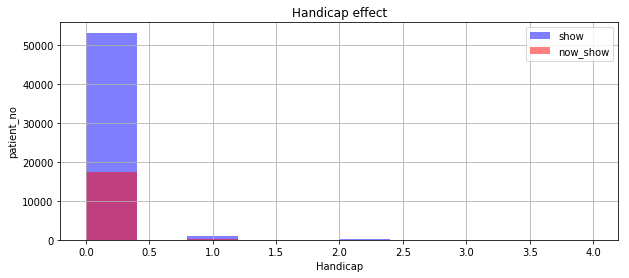

In [141]:
compare('Handicap', 'Handicap effect')

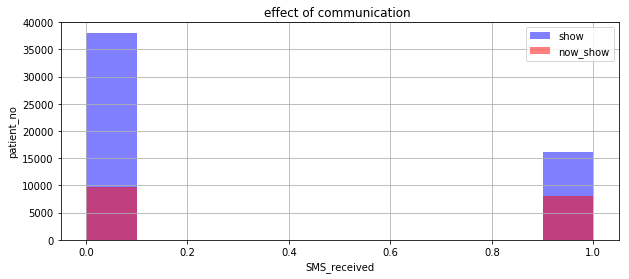

In [142]:
compare('SMS_received', 'effect of communication ')

### recieving an sms has reverse  effect
half of patient who recieved sms didn't come,this is strange, as the pattern of differnet variable except age has minimum effect lets investigate something else

# lets investigate age more deeply

In [143]:
df_1['Age'].describe()

count    71817.000000
mean        36.527006
std         23.378475
min          0.000000
25%         17.000000
50%         36.000000
75%         55.000000
max        115.000000
Name: Age, dtype: float64

In [144]:
df_young = df_1.query('Age < 36')


In [145]:
df_young[df_young['No_show'] == 'Yes'].shape[0]/df_young[df_young['No_show'] == 'No'].shape[0]


0.3688343843088707

In [146]:
df_old = df_1.query('Age >= 36')

In [147]:
df_old[df_old['No_show'] == 'Yes'].shape[0]/df_old[df_old['No_show'] == 'No'].shape[0]


0.2871930754283695

for the first look the older percentage of attendace is more then youn, lets cut it into four slices

In [148]:
df_inf = df_1.query('Age < 17')
df_med_1 = df_1.query('17 <= Age < 36')
df_med_2 = df_1.query(' 36 <= Age < 55')
df_old = df_1.query(' 55 <= Age')

here we divided all the data frame into four categories, each one with the same number of rows, and we will check the ratio between absence with whow attend
and the ratio of absence towards the whole category

In [149]:
df_inf_absent_ratios = df_inf[df_inf['No_show'] == 'Yes'].shape[0]/df_inf[df_inf['No_show'] == 'No'].shape[0]
df_inf_absent_ratios

0.3357989282209978

In [150]:
df_inf[df_inf['No_show'] == 'Yes'].shape[0]/df_inf.shape[0]

0.25138433721324444

In [151]:
df_df_med_1_absent_ratios = df_med_1[df_med_1['No_show'] == 'Yes'].shape[0]/df_med_1[df_med_1['No_show'] == 'No'].shape[0]
df_df_med_1_absent_ratios

0.4035714285714286

In [152]:
df_med_1[df_med_1['No_show'] == 'Yes'].shape[0]/df_med_1.shape[0]

0.2875318066157761

the absence in the med_1 slice where age is between 17 and 36 is with the highest absence value

In [153]:
df_med_2_absent_ratios =  df_med_2[df_med_2['No_show'] == 'Yes'].shape[0]/df_med_2[df_med_2['No_show'] == 'No'].shape[0]
df_med_2_absent_ratios

0.3317641784353284

In [154]:
df_med_2[df_med_2['No_show'] == 'Yes'].shape[0]/df_med_2.shape[0]

0.249116310385457

In [155]:
df_old_absent_ratios = df_old[df_old['No_show'] == 'Yes'].shape[0]/df_old[df_old['No_show'] == 'No'].shape[0]
df_old_absent_ratios

0.24721887146495108

In [156]:
df_old[df_old['No_show'] == 'Yes'].shape[0]/df_old.shape[0]

0.1982161087528881

the absence of the old categore is the lowest between all age categories

In [157]:
df_inf['SMS_received'].value_counts()

0    12338
1     5360
Name: SMS_received, dtype: int64

In [158]:
df_med_1['SMS_received'].value_counts()

0    11489
1     6196
Name: SMS_received, dtype: int64

In [159]:
df_med_2['SMS_received'].value_counts()


0    11495
1     6328
Name: SMS_received, dtype: int64

In [160]:
df_old['SMS_received'].value_counts()

0    12396
1     6215
Name: SMS_received, dtype: int64

<a id='conclusions'></a>
## Conclusions

from the data we studied and analyze we could understand too many thing
first age is the most impotant variable we noticed where we divided age into four categories from 0 day to 17, 17 to 36, 36 to 55 and 55 to the maximum
we saw the category from 0 to 17 and from 36 to 55 is within the normal absence
category from 17 to 36 is the highest probabilty with absence 
category from 55 up to the maximum is with the lowest absence rate

Neighborhood variable seems to has big impact but i can't find away to analyze 80 districs, and that was my biggest limitations
and i don't have the population of each district to understand the ratios between attending and absence and population
maybe if the data could be divided into five districs we could find a meaning for each district

one thing i couldn't understand how sending SMS has a negative relationship with attending the meating, either the data of the appointment is send in a wrong way or something else, this needs more studying

the rest of the variable, i can't find a deep impact on the problem of absence, i think persons under 17, their parents are care to go to hospitals with them, between 17 and 36 youth are careless about themselves, but after 36 the caring by healthcare increase till it be the most after 55 years old



## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [161]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0